# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Ananda Putra W.R.]
- **Email:** [ananda9102003@gmail.com]
- **ID Dicoding:** [ananda_putra_esdn]

## Menentukan Pertanyaan Bisnis

- Bagaimana kombinasi faktor cuaca dan waktu memengaruhi pola permintaan penyewaan sepeda, dan bagaimana kita dapat memanfaatkan informasi ini untuk mengoptimalkan strategi penyewaan?
- Apakah ada perbedaan signifikan dalam perilaku penyewaan sepeda antara pelanggan harian dan terdaftar, dan bagaimana kita bisa mengoptimalkan layanan untuk kedua segmen ini?
- Apakah penyewaan sepeda lebih banyak terjadi pada hari kerja atau akhir pekan? 

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_data = pd.read_csv('Data/day.csv')

**Insight:**
- Pengambilan data dari Bike Sharing Dataset untuk penganalisisan data peminjaman sepeda
- Data yang dipakai pada code ini adalah dataset "day.csv"

### Assessing Data

In [3]:
day_data['month'] = pd.to_datetime(day_data['dteday']).dt.month_name()
weather_mapping = {1: 'Cerah', 2: 'Berawan/Mendung', 3: 'Hujan/Salju Ringan'}
day_data['weathersit_label'] = day_data['weathersit'].map(weather_mapping)

**Insight:**
-  kolom month untuk dapat melihat tren musiman untuk mengetahui bulan mana yang memiliki permintaan penyewaan sepeda lebih tinggi.
-  mengubah label agar membantu memahami bagaimana kondisi cuaca mempengaruhi jumlah penyewaan sepeda, misalnya penyewaan lebih tinggi saat cuaca cerah.

### Cleaning Data

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [8]:
print(day_data.info())
print(day_data.describe())
print(day_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           731 non-null    int64         
 1   dteday            731 non-null    datetime64[ns]
 2   season            731 non-null    int64         
 3   yr                731 non-null    int64         
 4   mnth              731 non-null    int64         
 5   holiday           731 non-null    int64         
 6   weekday           731 non-null    int64         
 7   workingday        731 non-null    int64         
 8   weathersit        731 non-null    int64         
 9   temp              731 non-null    float64       
 10  atemp             731 non-null    float64       
 11  hum               731 non-null    float64       
 12  windspeed         731 non-null    float64       
 13  casual            731 non-null    int64         
 14  registered        731 non-

In [4]:
day_data['year'] = day_data['yr'].apply(lambda x: '2011' if x == 0 else '2012')
day_data['month'] = pd.to_datetime(day_data['dteday']).dt.month_name()

print(day_data[['dteday', 'month']].head())  

day_data['Total'] = day_data['casual'] + day_data['registered'] 

day_data['dteday'] = pd.to_datetime(day_data['dteday'])  
recency = day_data['dteday'].max() - day_data['dteday']  
day_data['Recency'] = recency.dt.days  

day_data['R'] = pd.qcut(day_data['Recency'], 4, labels=False)  
day_data['F'] = pd.qcut(day_data['Total'], 4, labels=False)     
day_data['M'] = pd.qcut(day_data['Total'], 4, labels=False)     

rfm_data = day_data[['R', 'F', 'M', 'Total']]
print(rfm_data.head())

       dteday    month
0  2011-01-01  January
1  2011-01-02  January
2  2011-01-03  January
3  2011-01-04  January
4  2011-01-05  January
   R  F  M  Total
0  3  0  0    985
1  3  0  0    801
2  3  0  0   1349
3  3  0  0   1562
4  3  0  0   1600


**Insight:**
- Untuk memastikan dataset siap untuk analisis lebih lanjut
- memberikan statistik seperti rata-rata (mean), standar deviasi (std), nilai minimum dan maksimum menunjukkan sebaran data penyewaan sepeda, yang membantu untuk memahami rentang dan variabilitas dalam penggunaan.

## Visualization & Explanatory Analysis

### Visualisasi Pertanyaan 1:

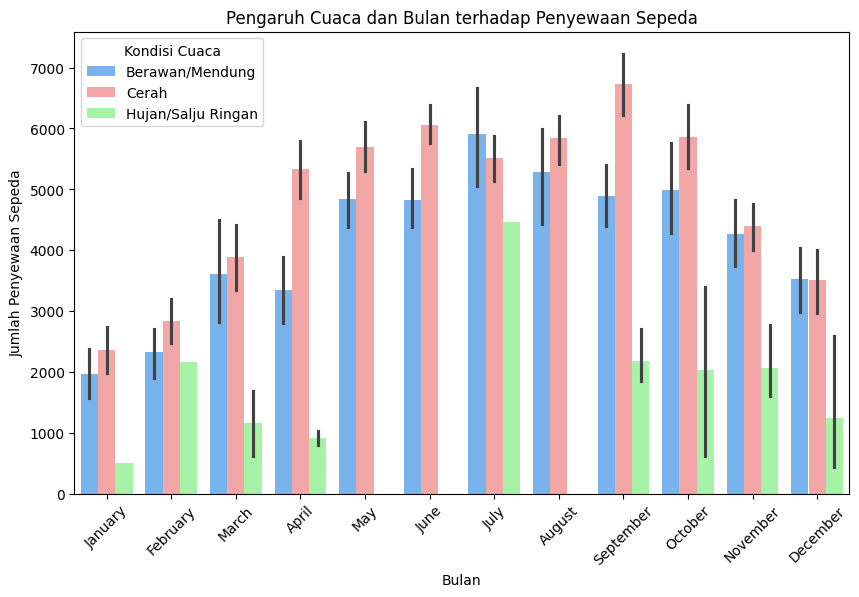

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='cnt', hue='weathersit_label', data=day_data, palette=['#66b3ff', '#ff9999', '#99ff99'])
plt.title('Pengaruh Cuaca dan Bulan terhadap Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Kondisi Cuaca')
plt.show()



### Visualisasi Pertanyaan 2:

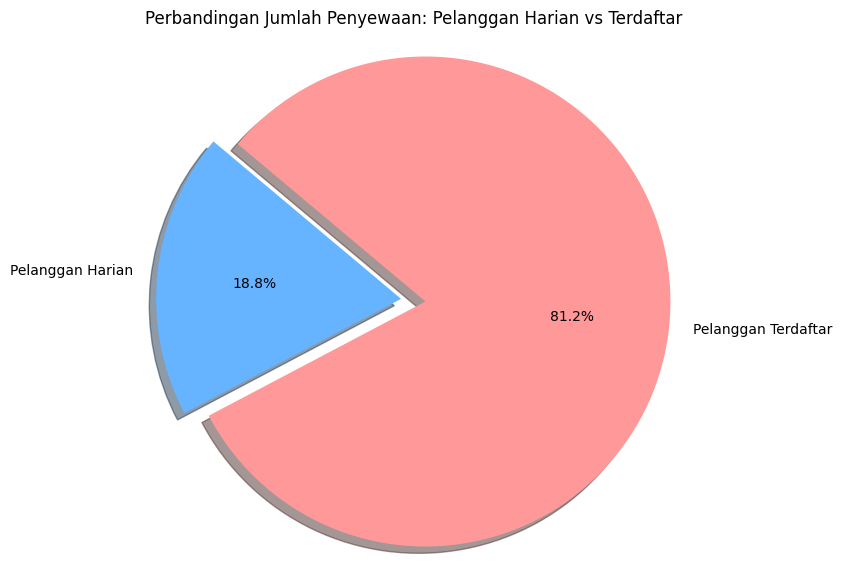

In [6]:
labels = ['Pelanggan Harian', 'Pelanggan Terdaftar']
sizes = [day_data['casual'].sum(), day_data['registered'].sum()]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Perbandingan Jumlah Penyewaan: Pelanggan Harian vs Terdaftar')
plt.axis('equal')
plt.show()


### Visualisasi Pertanyaan 3

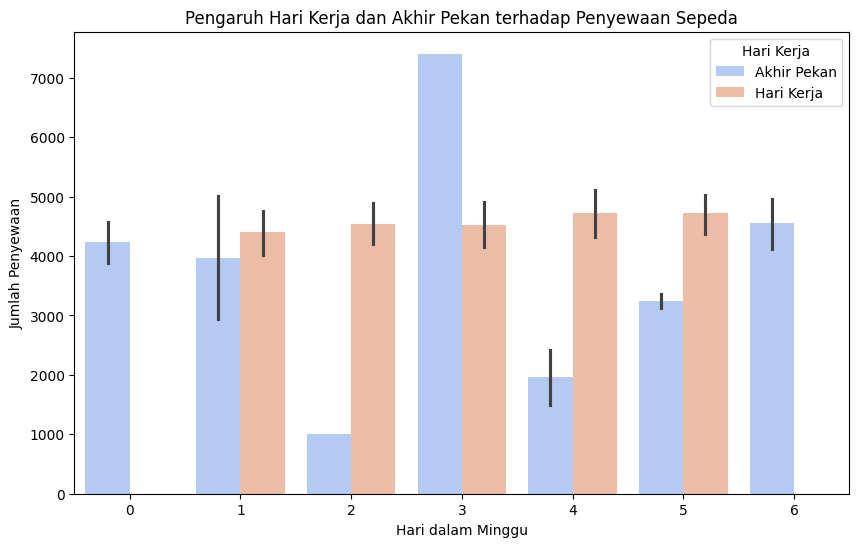

In [9]:
working_day_labels = {0: 'Akhir Pekan', 1: 'Hari Kerja'}
day_data['workingday_label'] = day_data['workingday'].map(working_day_labels)

plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', hue='workingday_label', data=day_data, palette="coolwarm")
plt.title('Pengaruh Hari Kerja dan Akhir Pekan terhadap Penyewaan Sepeda')
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Hari Kerja')
plt.show()


**Insight:**
- Melihat anasilis data dari penyewaan sepeda yang dipengaruhi beberapa faktor yang ditanyakan
- Mendapatkan visualisasi data dari pertanyaan tentang penyewaan data yang dipengaruhi faktor faktor yang ada

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
Cuaca yang lebih baik mempengaruhi permintaan penyewaan sepeda secara positif. Bulan-bulan dengan cuaca lebih hangat cenderung memiliki permintaan yang lebih tinggi.
- Conclution pertanyaan 2
Pelanggan terdaftar mendominasi penyewaan sepeda, menunjukkan bahwa sepeda mungkin digunakan sebagai transportasi reguler oleh mereka.
- Conclution pertanyaan 3
Lebih banyak penyewaan terjadi pada hari kerja, yang bisa menunjukkan bahwa sepeda lebih sering digunakan untuk bekerja daripada sekedar rekreasi.